# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn import metrics
import pickle

# Loading Data

In [3]:
df = pd.read_excel('AirQuality.xlsx')
print(df)

                         WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m

In [4]:
df.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32190 non-null  object 
 1   ISO3                                    32191 non-null  object 
 2   WHO Country Name                        32191 non-null  object 
 3   City or Locality                        32191 non-null  object 
 4   Measurement Year                        32191 non-null  int64  
 5   PM2.5 (μg/m3)                           15048 non-null  float64
 6   PM10 (μg/m3)                            21109 non-null  float64
 7   NO2 (μg/m3)                             22200 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5381 non-null   float64
 10  NO2 temporal coverage (%)               19890 non-null  fl

In [6]:
df.describe()

,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Version of the database,Status
count,32191.000000,15048.000000,21109.000000,22200.000000,7275.000000,5381.000000,19890.000000,32191.000000,0.0
mean,2015.579354,22.920320,30.533252,20.619336,90.794096,90.583500,93.696804,2021.744214,NaN
std,2.752654,17.925906,29.312756,12.133388,14.872681,13.816311,10.451751,1.051897,NaN
min,2000.000000,0.010000,1.040000,0.000000,0.000000,2.568493,1.923077,2016.000000,NaN
25%,2014.000000,10.350000,16.980000,12.000000,88.595890,87.945205,93.207763,2022.000000,NaN
50%,2016.000000,16.000000,22.000000,18.800000,97.000000,96.039000,96.369863,2022.000000,NaN
75%,2018.000000,31.000000,31.300000,27.160000,99.000000,98.938000,98.926941,2022.000000,NaN
max,2021.000000,191.900000,540.000000,210.680000,100.000000,100.000000,100.000000,2022.000000,NaN


In [7]:
df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

In [8]:
df.dtypes

WHO Region                                 object
ISO3                                       object
WHO Country Name                           object
City or Locality                           object
Measurement Year                            int64
PM2.5 (μg/m3)                             float64
PM10 (μg/m3)                              float64
NO2 (μg/m3)                               float64
PM25 temporal coverage (%)                float64
PM10 temporal coverage (%)                float64
NO2 temporal coverage (%)                 float64
Reference                                  object
Number and type of monitoring stations     object
Version of the database                     int64
Status                                    float64
dtype: object

# Drop Unnecessary Columns

In [9]:
columns_to_drop = [
    'PM25 temporal coverage (%)',
    'PM10 temporal coverage (%)',
    'NO2 temporal coverage (%)',
    'Status'
]

df.drop(columns=[c for c in columns_to_drop if c in df.columns], inplace=True)
print(df)

                         WHO Region ISO3 WHO Country Name City or Locality  \
0      Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1                   European Region  ALB          Albania           Durres   
2                   European Region  ALB          Albania           Durres   
3                   European Region  ALB          Albania          Elbasan   
4                   European Region  ALB          Albania          Elbasan   
...                             ...  ...              ...              ...   
32186                African Region  ZAF     South Africa       West Coast   
32187                African Region  ZAF     South Africa       West Coast   
32188                African Region  ZAF     South Africa       West Coast   
32189                African Region  ZAF     South Africa       West Coast   
32190                African Region  ZAF     South Africa        West Rand   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m

# Handle Missing Values

In [10]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.ffill(inplace=True)
df.bfill(inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
WHO Region                                0
ISO3                                      0
WHO Country Name                          0
City or Locality                          0
Measurement Year                          0
PM2.5 (μg/m3)                             0
PM10 (μg/m3)                              0
NO2 (μg/m3)                               0
Reference                                 0
Number and type of monitoring stations    0
Version of the database                   0
dtype: int64


# Removing Outliers

In [11]:
Q1 = df['PM2.5 (μg/m3)'].quantile(0.25)
Q3 = df['PM2.5 (μg/m3)'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

df = df[(df['PM2.5 (μg/m3)'] >= Q1 - threshold) &
        (df['PM2.5 (μg/m3)'] <= Q3 + threshold)]

print(df)
print("Shape after outlier removal:", df.shape)


            WHO Region ISO3 WHO Country Name City or Locality  \
1      European Region  ALB          Albania           Durres   
2      European Region  ALB          Albania           Durres   
3      European Region  ALB          Albania          Elbasan   
4      European Region  ALB          Albania          Elbasan   
5      European Region  ALB          Albania          Elbasan   
...                ...  ...              ...              ...   
32182   African Region  ZAF     South Africa        Waterberg   
32183   African Region  ZAF     South Africa        Waterberg   
32184   African Region  ZAF     South Africa       West Coast   
32185   African Region  ZAF     South Africa       West Coast   
32190   African Region  ZAF     South Africa        West Rand   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
1                  2015       22.92032     17.650000        26.63   
2                  2016       14.32000     24.560000        24.78   
3           

# Encode Categorical Columns

In [12]:
le = LabelEncoder()
cat_cols = ['WHO Region','WHO Country Name','City or Locality','Reference','Number and type of monitoring stations']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Visualization

<Axes: xlabel='PM2.5 (μg/m3)'>

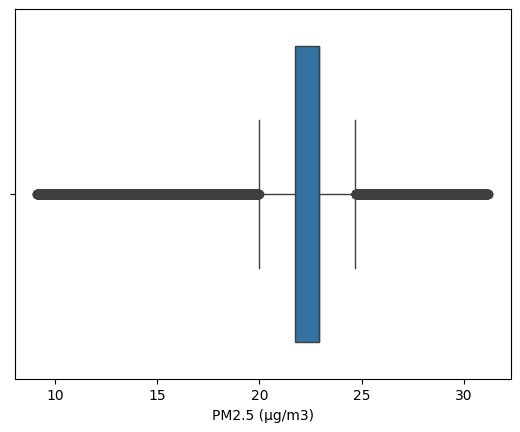

In [13]:
sns.boxplot(x=df['PM2.5 (μg/m3)'])

<Axes: xlabel='PM10 (μg/m3)'>

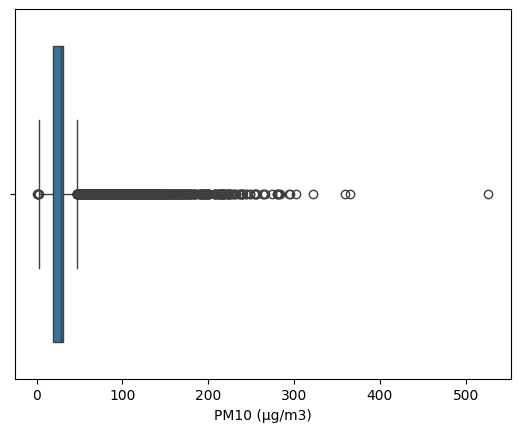

In [14]:
sns.boxplot(x=df['PM10 (μg/m3)'])

<Axes: xlabel='NO2 (μg/m3)'>

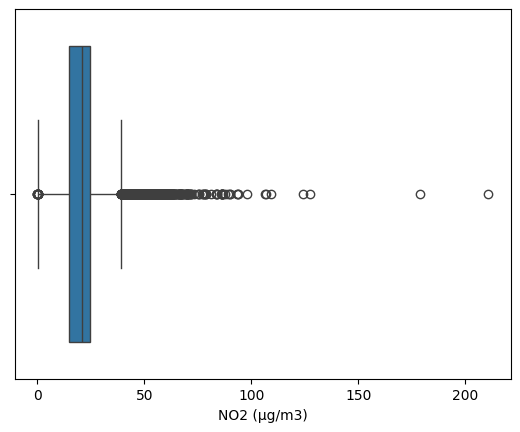

In [15]:
sns.boxplot(x=df['NO2 (μg/m3)'])

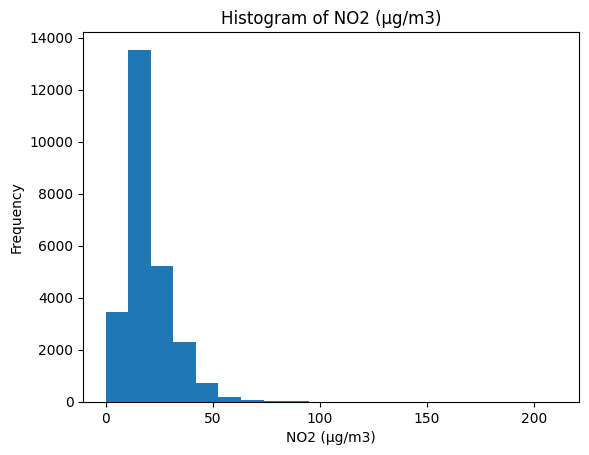

In [16]:
plt.hist(df['NO2 (μg/m3)'], bins=20)
plt.xlabel('NO2 (μg/m3)')
plt.ylabel('Frequency')
plt.title('Histogram of NO2 (μg/m3)')
plt.show()

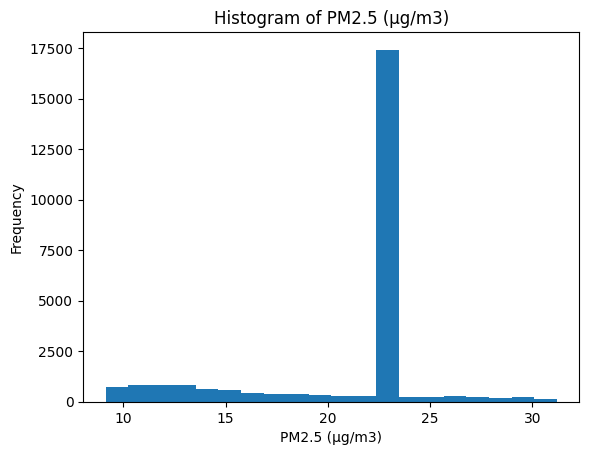

In [17]:
plt.hist(df['PM2.5 (μg/m3)'], bins=20)
plt.xlabel('PM2.5 (μg/m3)')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5 (μg/m3)')
plt.show()

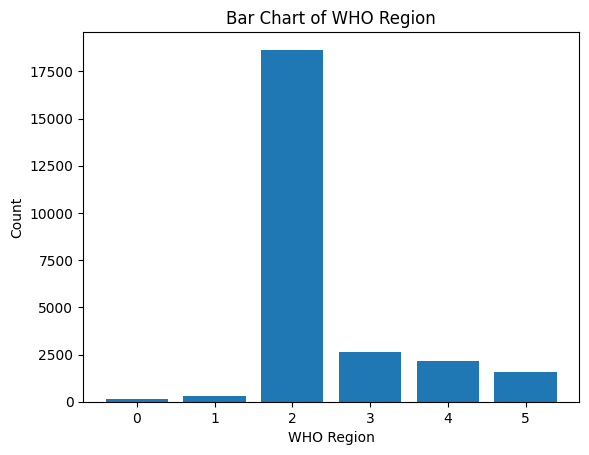

In [18]:
plt.bar(df['WHO Region'].value_counts().index, df['WHO Region'].value_counts())
plt.xlabel('WHO Region')
plt.ylabel('Count')
plt.title('Bar Chart of WHO Region')
plt.show()

<Axes: title={'center': 'PM 10 Levels in different WHO Regions'}, xlabel='WHO Region', ylabel='Level'>

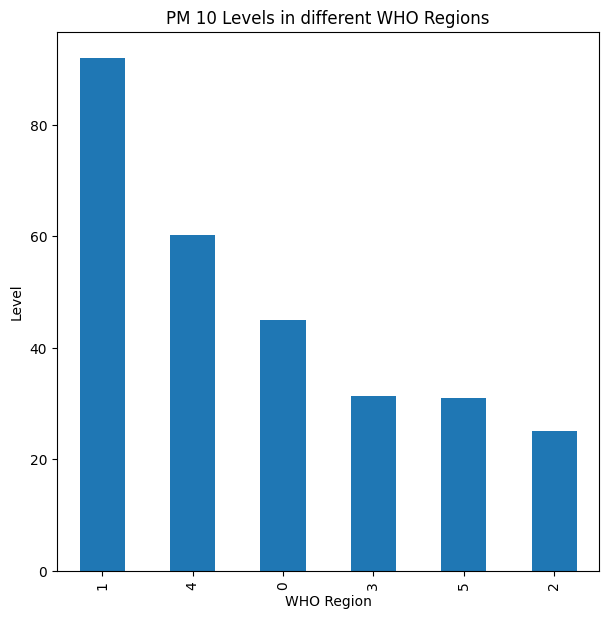

In [19]:
# Plotting the horizontal bar plot for cities against PM 10 level value.
pm_10=df.groupby("WHO Region")["PM10 (μg/m3)"].mean()
pm_10.sort_values(ascending=False).head(10) .plot(figsize=(7,7),kind="bar",title="PM 10 Levels in different WHO Regions", xlabel="WHO Region", ylabel="Level")

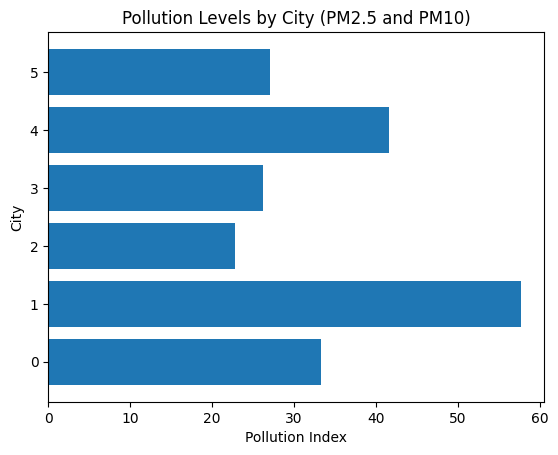

In [20]:
avg_pm25 = df.groupby('WHO Region')['PM2.5 (μg/m3)'].mean()
avg_pm10 = df.groupby('WHO Region')['PM10 (μg/m3)'].mean()

# Combine the average values for both PM2.5 and PM10
avg_pollution = pd.concat([avg_pm25, avg_pm10], axis=1)

# Calculate the overall pollution index
avg_pollution['Pollution_Index'] = avg_pollution.mean(axis=1)

# Sort the cities by pollution index
sorted_pollution = avg_pollution.sort_values('Pollution_Index', ascending=False)

# Plot the most polluted city
plt.barh(sorted_pollution.index, sorted_pollution['Pollution_Index'])
plt.xlabel('Pollution Index')
plt.ylabel('City')
plt.title('Pollution Levels by City (PM2.5 and PM10)')
plt.show()

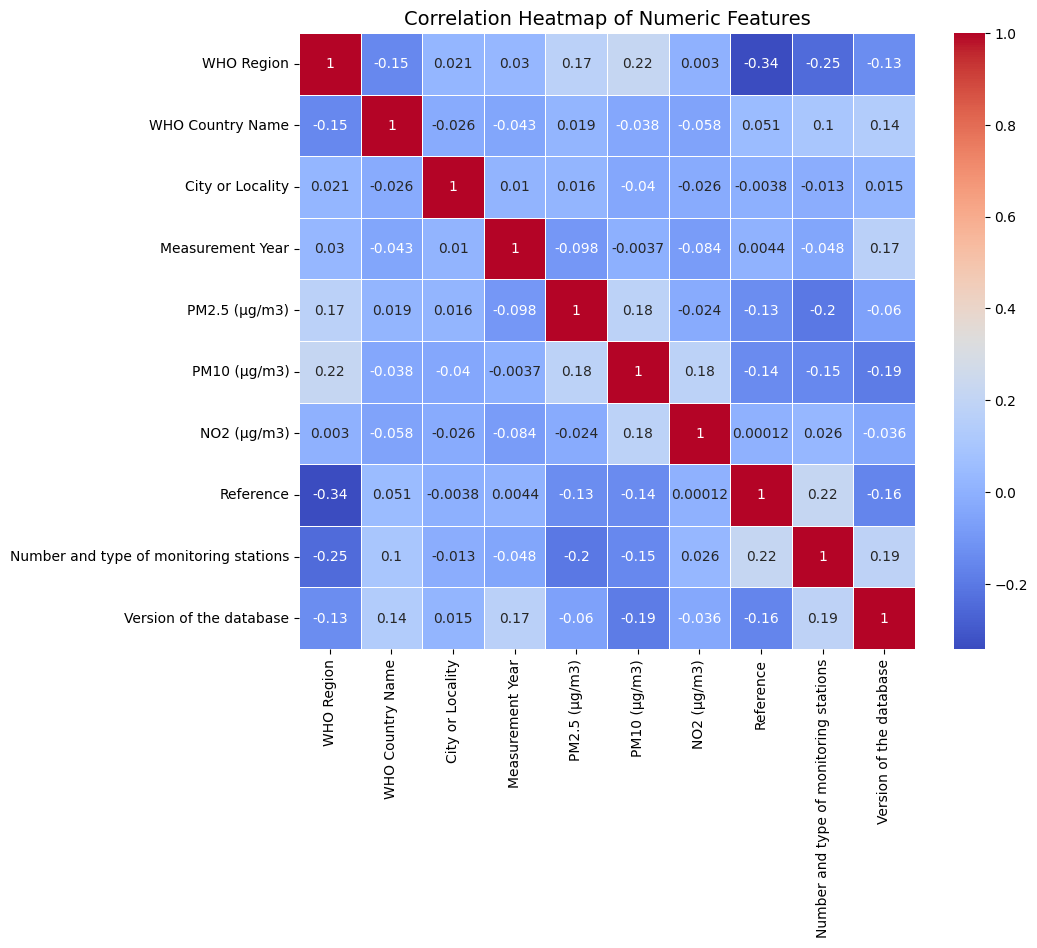

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    square=True
)

plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.show()

# Model Training

In [22]:
X = df[['PM10 (μg/m3)','NO2 (μg/m3)','Measurement Year','WHO Region','WHO Country Name','City or Locality']]
y = df['PM10 (μg/m3)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [23]:
models = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
models['Linear Regression'] = lr

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
models['Polynomial Regression'] = (poly, poly_reg)

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
models['Random Forest'] = rf

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
models['Gradient Boosting'] = gb

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
models['XGBoost'] = xgb_model

# Evaluating All Models

In [24]:
results = {}

def evaluate(y_true, y_pred):
    r2 = metrics.r2_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

for name, model in models.items():
    if name == 'Polynomial Regression':
        poly, reg = model
        preds = reg.predict(X_test_poly)
    else:
        preds = model.predict(X_test)
    results[name] = evaluate(y_test, preds)

# Print results
for m, s in results.items():
    print(f"{m}: R2={s[0]:.4f}, MAE={s[1]:.4f}, RMSE={s[2]:.4f}")

Linear Regression: R2=1.0000, MAE=0.0000, RMSE=0.0000
Polynomial Regression: R2=1.0000, MAE=0.0000, RMSE=0.0000
Random Forest: R2=0.9858, MAE=0.0511, RMSE=2.7128
Gradient Boosting: R2=0.9909, MAE=0.1535, RMSE=2.1748
XGBoost: R2=0.9801, MAE=0.3352, RMSE=3.2173


# Choosing Best Model

In [27]:
valid_models = ['Random Forest', 'Gradient Boosting', 'XGBoost']
best_model_name = min(valid_models, key=lambda x: results[x][2])
best_model = models[best_model_name]

print("\nBest Model:", best_model_name)
print("Scores:", results[best_model_name])


Best Model: Gradient Boosting
Scores: (0.9908919480243257, 0.1534971128392936, np.float64(2.1747880417796446))


# Saving Best Model

In [28]:
if best_model_name == 'Polynomial Regression':
    with open('best_model.pkl', 'wb') as f:
        pickle.dump({'transformer': poly, 'model': best_model[1]}, f)
else:
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\nModel saved successfully!")


Model saved successfully!
